In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the first CSV file to examine its contents
batteries_df = pd.read_csv('batteries.csv')
batteries_df.head()

,export_in_tonn,export_in_1000_,import_in_tonn,import_in_1000_,product_id,product_name,export_percent,import_percent,date
0,1.677,1.96249,135.90394,558.609950,8507,batteries,97%,13%,2007-01-01
1,0.000,0.00000,107.03717,165.555570,8507,batteries,0%,6%,2007-02-01
2,0.000,0.00000,2.38241,14.643305,8507,batteries,0%,0%,2007-03-01
3,0.000,0.00000,147.44648,330.070624,8507,batteries,0%,10%,2007-04-01
4,0.000,0.00000,77.63390,176.632880,8507,batteries,0%,5.5%,2007-05-01


In [2]:
# Load the second CSV file to examine its contents
cars_df = pd.read_csv('carss.csv')
cars_df.head()

,product_id,product_name,import_amount,export_amount,date
0,8703,cars,2302,66,2007-01-01
1,8703,cars,2311,97,2007-02-01
2,8703,cars,3167,142,2007-03-01
3,8703,cars,2959,113,2007-04-01
4,8703,cars,3258,154,2007-05-01


In [3]:
# Merge the two dataframes on the 'date' column
combined_df = pd.merge(batteries_df, cars_df, on="date", suffixes=('_batteries', '_cars'))

# Show the combined dataframe to ensure correct merging
combined_df.head()


,export_in_tonn,export_in_1000_,import_in_tonn,import_in_1000_,product_id_batteries,product_name_batteries,export_percent,import_percent,date,product_id_cars,product_name_cars,import_amount,export_amount
0,1.677,1.96249,135.90394,558.609950,8507,batteries,97%,13%,2007-01-01,8703,cars,2302,66
1,0.000,0.00000,107.03717,165.555570,8507,batteries,0%,6%,2007-02-01,8703,cars,2311,97
2,0.000,0.00000,2.38241,14.643305,8507,batteries,0%,0%,2007-03-01,8703,cars,3167,142
3,0.000,0.00000,147.44648,330.070624,8507,batteries,0%,10%,2007-04-01,8703,cars,2959,113
4,0.000,0.00000,77.63390,176.632880,8507,batteries,0%,5.5%,2007-05-01,8703,cars,3258,154


In [4]:
# Calculate correlation matrix for the combined dataset
correlation_matrix = combined_df[[
    'export_in_tonn', 'export_in_1000_', 'import_in_tonn', 'import_in_1000_',
    'import_amount', 'export_amount'
]].corr()

correlation_matrix


,export_in_tonn,export_in_1000_,import_in_tonn,import_in_1000_,import_amount,export_amount
export_in_tonn,1.000000,0.746033,0.178919,0.150474,0.056167,0.131708
export_in_1000_,0.746033,1.000000,0.323759,0.383957,0.201837,0.491208
import_in_tonn,0.178919,0.323759,1.000000,0.821977,0.389323,0.375013
import_in_1000_,0.150474,0.383957,0.821977,1.000000,0.399845,0.468126
import_amount,0.056167,0.201837,0.389323,0.399845,1.000000,0.423100
export_amount,0.131708,0.491208,0.375013,0.468126,0.423100,1.000000


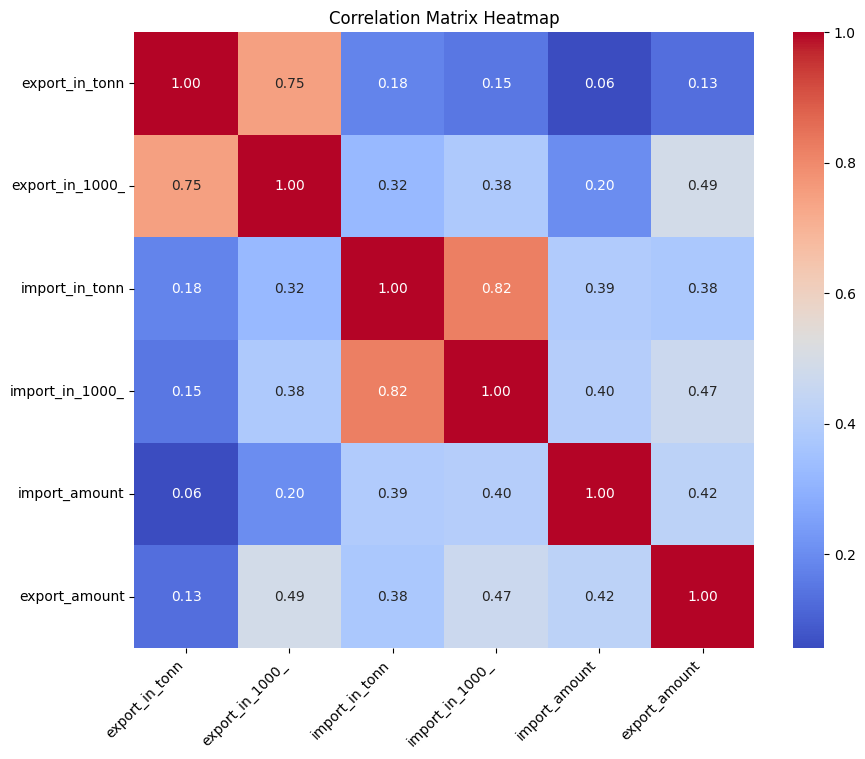

In [5]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



- Strong Internal Correlations:

Within the batteries data, there is a strong correlation between imports measured in tons and thousands (0.82), indicating that these two metrics reliably move together.

Similarly, exports in tons and thousands for batteries are also correlated (0.75).
- Moderate Cross-Metric Correlations:

There's a moderate correlation between exports of batteries (in thousands) and exports of cars (0.49), suggesting that when exports of batteries increase, there tends to be an increase in car exports as well.

Imports of batteries (both in tons and thousands) have a moderate correlation with car imports (0.39 and 0.40 respectively), indicating a somewhat synchronized import activity between these sectors.
- Weak Cross-Industry Impact:

The correlations between the export metrics of batteries and their import metrics are generally weak (0.18 and lower), which indicates that exports of batteries are not strongly linked to their imports within the same time periods.


Similarly, correlations between battery exports or imports and car exports or imports are mostly moderate, suggesting only a partial linkage between the performance of these two sectors.


Overall, these findings suggest that while each sector (batteries and cars) shows internal consistency in terms of how imports and exports correlate, the interaction between these sectors, although present, is not very strong. This implies that while there might be some shared economic or logistic factors influencing both, they operate somewhat independently in terms of their import and export dynamics.

Based on the results from the correlation analysis and heatmap visualization, the judgment is as follows:

1. **Operational Independence**: Each sector, batteries and cars, shows a degree of operational independence. This is indicated by moderate to weak correlations when comparing imports and exports between these two industries. This suggests that factors driving imports and exports in these sectors may be distinct and not directly influenced by each other.

2. **Internal Consistency**: Both the batteries and cars sectors display strong internal consistency. This is evident from the high correlation values between similar metrics (e.g., imports in tons vs. imports in thousands). This consistency is useful for predictive modeling and planning within each sector.

3. **Economic Interaction**: The moderate correlations observed between the exports of batteries and cars, and between their imports, suggest some level of economic interaction. This might be due to shared market conditions, logistic networks, or regulatory environments affecting both sectors. However, this interaction is not very strong, implying that major shifts in one sector might not necessarily result in proportional shifts in the other.

4. **Strategic Implications**: For stakeholders in these industries, such strategic insights suggest that while it's important to monitor trends within one's sector, watching cross-industry trends can provide additional context. However, decisions should primarily focus on intra-industry data due to the stronger correlations within each sector.

5. **Further Analysis Recommended**: Given the moderate cross-industry correlations, further detailed analysis could be beneficial. This might include examining external factors like economic policies, global market trends, or supply chain issues that could subtly link these sectors beyond what is directly observable from the data.

Overall, the judgment calls for cautious interpretation of the interdependencies between these sectors while acknowledging the robust internal dynamics that characterize each.

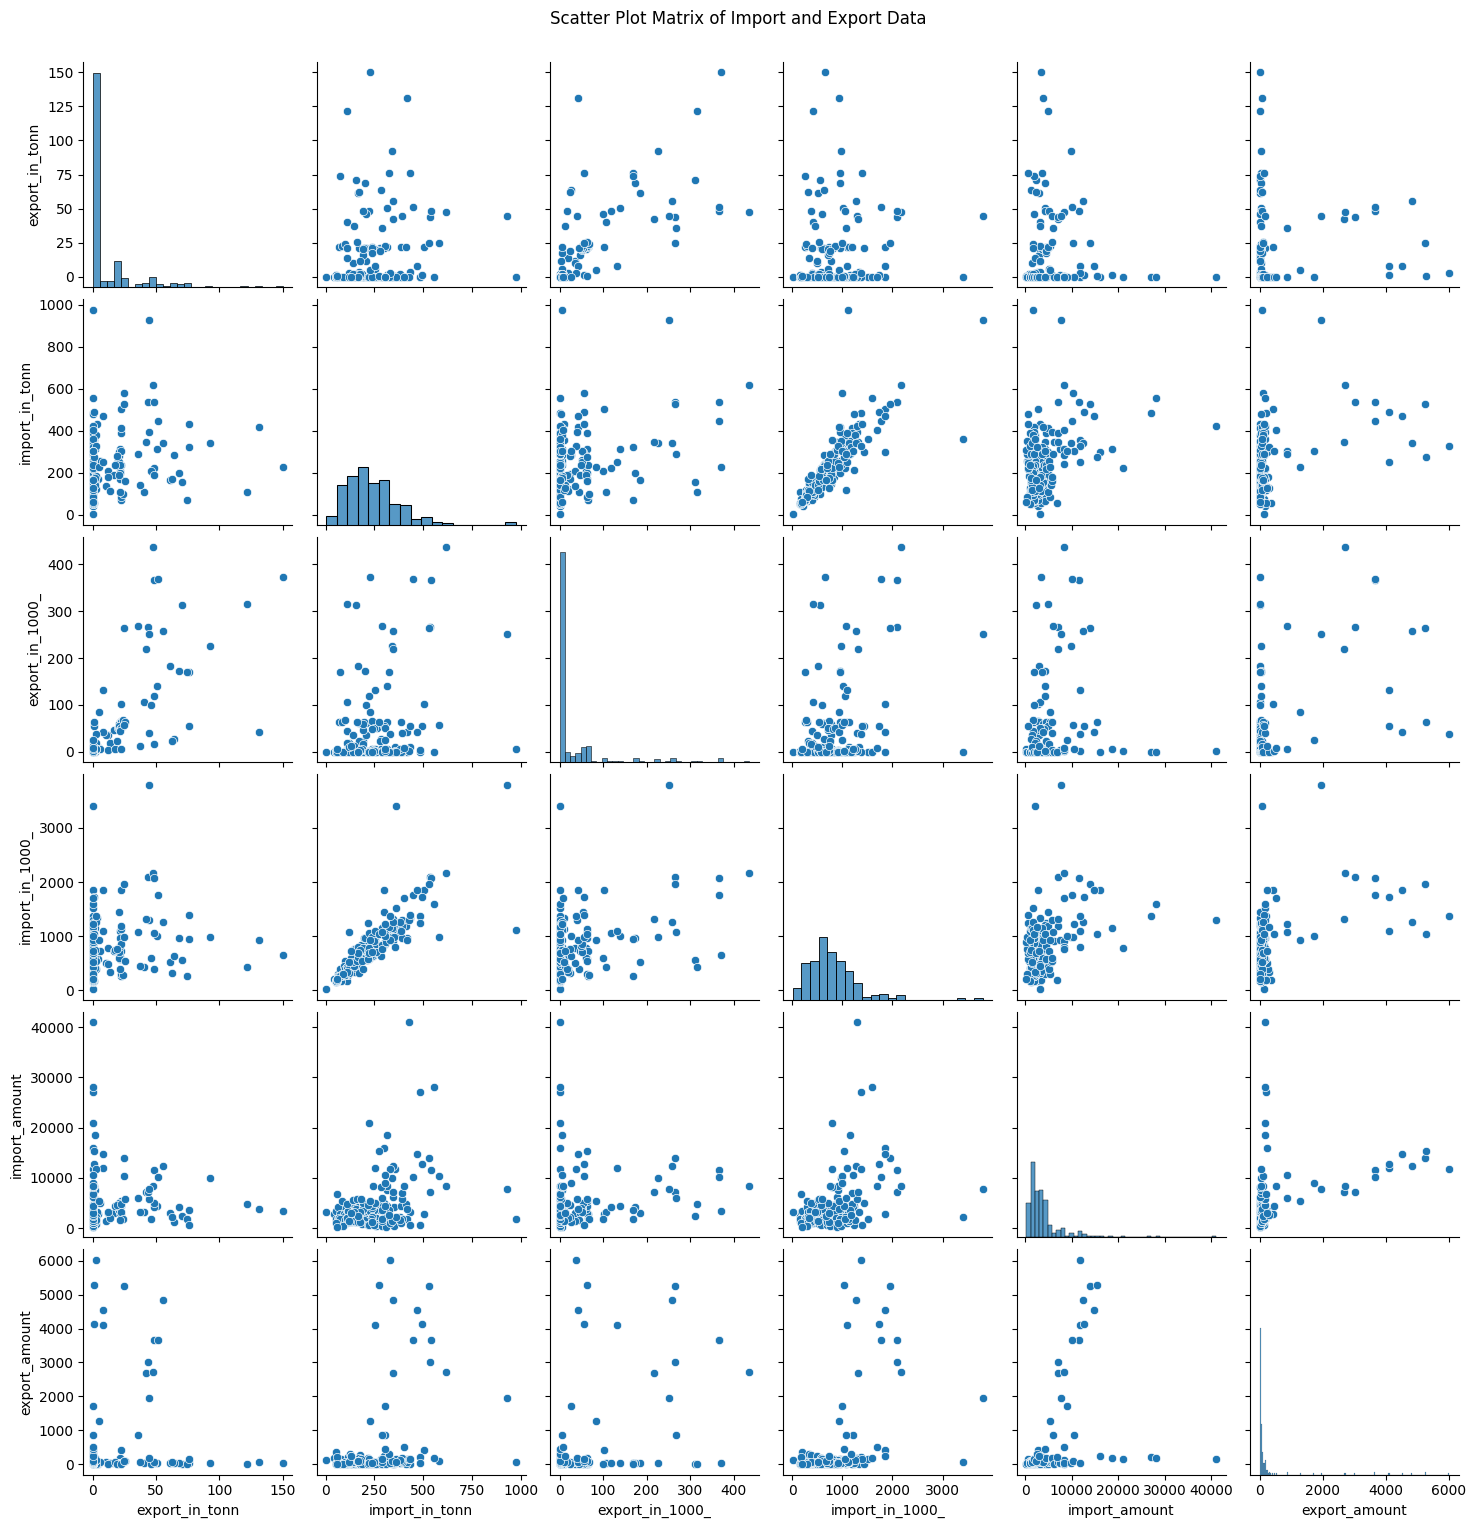

In [6]:
# Create a pair plot for selected variables
pair_plot_data = combined_df[['export_in_tonn', 'import_in_tonn', 'export_in_1000_', 'import_in_1000_', 'import_amount', 'export_amount']]
sns.pairplot(pair_plot_data)
plt.suptitle('Scatter Plot Matrix of Import and Export Data', y=1.02)
plt.show()


In [7]:
# Assuming batteries_df and cars_df are your initial DataFrames
batteries_imports = batteries_df[['date', 'import_in_1000_']].rename(columns={'import_in_1000_': 'batteries_imports'})
cars_imports = cars_df[['date', 'import_amount']].rename(columns={'import_amount': 'cars_imports'})

# Merge datasets on the date column
merged_data = pd.merge(batteries_imports, cars_imports, on='date')

# Convert 'date' to datetime if not already
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Exclude the 'date' column from the data used for correlation
correlation_data = merged_data.drop('date', axis=1)

# Calculate the correlation between imports of batteries and cars
correlation = correlation_data.corr()

print(correlation)

                   batteries_imports  cars_imports
batteries_imports           1.000000      0.399845
cars_imports                0.399845      1.000000


### The correlation between the imports of batteries and cars over time is approximately 0.40. This indicates a moderate positive correlation, suggesting that as the import of one increases, the import of the other tends to increase as well, though not as strongly as it might with a higher correlation coefficient.

                   batteries_imports  cars_imports
batteries_imports           1.000000      0.399845
cars_imports                0.399845      1.000000


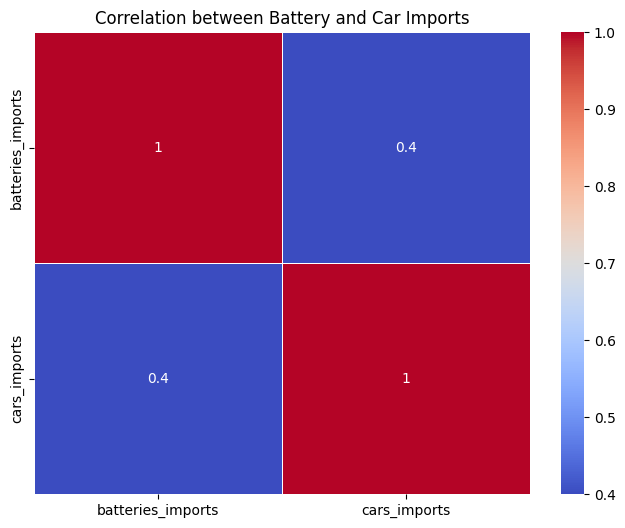

In [8]:
# Assuming batteries_df and cars_df are your initial DataFrames
batteries_imports = batteries_df[['date', 'import_in_1000_']].rename(columns={'import_in_1000_': 'batteries_imports'})
cars_imports = cars_df[['date', 'import_amount']].rename(columns={'import_amount': 'cars_imports'})

# Merge datasets on the date column
merged_data = pd.merge(batteries_imports, cars_imports, on='date')

# Convert 'date' to datetime if not already
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Exclude the 'date' column from the data used for correlation
correlation_data = merged_data.drop('date', axis=1)

# Calculate the correlation between imports of batteries and cars
correlation = correlation_data.corr()

# Print the correlation matrix
print(correlation)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between Battery and Car Imports')
plt.show()
